In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
l_ref = 1e6
v_w0 = np.array((-10, 0))
y_w = l_ref * 0.5
w_w = l_ref * 0.1
k_p = 0.1

dt = 1000

# Band wind
def v_w(t, x):
    if y_w - w_w < x[1] < y_w + w_w:
        return v_w0
    else:
        return np.array((0, 0))
def dv_w(t, x):
    dl = l_ref * 1e-5
    dy = dl * np.array((0, 1))
    dvdy = 1/(2*dl) * (v_w(t, x + dy) - v_w(t, x - dy))
    return np.array(((0, dvdy[0]), (0, dvdy[1])))

def power(v_a):
    return k_p * v_a ** 3

def asp_opti(p):
    pn = np.linalg.norm(p)
    return -p/pn * (pn / k_p) ** 1/3 

def dyn(t, x, p):
    xx = x + (asp_opti(p) + v_w(t, x))*dt
    pp = p - dt * dv_w(t, x).transpose() @ p
    return xx, pp

In [62]:
x0 = np.array((0, 0))
theta0 = -np.pi/2 + 0.01
p0 = 10 * np.array((np.cos(theta0), np.sin(theta0)))
t = 0

Na = 10
Ne = 10
N = 20
points = np.zeros((Na, Ne, N, 4))
for ia in range(Na):
    for ie in range(Ne):
        points[ia, ie, 0, :2] = x0
        theta = theta0 + ie * 0.05 + (0.025 if ia % 2 == 0 else 0.)
        p0 = 10* (0.5 + ia*0.1) * np.array((np.cos(theta), np.sin(theta)))
        points[ia, ie, 0, 2:] = p0

for i in range(1, N):
    for ie in range(Ne):
        for ia in range(Na):
            t += dt
            x = np.zeros(2)
            p = np.zeros(2)
            x[:] = points[ia, ie, i-1, :2]
            p[:] = points[ia, ie, i-1, 2:]
            xx, pp = dyn(t, x, p)
            points[ia, ie, i, :2] = xx
            points[ia, ie, i, 2:] = pp

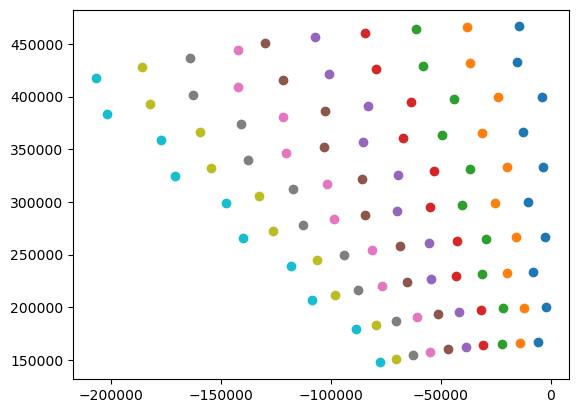

In [63]:
it = 10
for ia in range(Na):
    for ie in range(Ne):
        plt.scatter(points[ia, ie, it, 0], points[ia, ie, it, 1])

In [36]:
asp_opti(p)

array([-0.33332778, 33.33166668])